<a href="https://colab.research.google.com/github/moyeed/AML_Assign1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Assignment-1
# Name and z-Id: Mohammed Abdul Moyeed (Z-1912165)


## Import statements

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import os
import json
from urllib.request import urlretrieve
import pandas as pd
from scipy import stats


## 1. Pick a graph from http://www.tylervigen.com/spurious-correlations and recreate it using matplotlib (you can also use numpy and pandas). You can generate the data manually by looking at the points. Ensure the axes are labeled properly.

### Co-relation between "Japanese passenger cars sold in US" with "Suicides by crashing of motor vehicles"

In [ ]:
# data extracted from the source.
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
cars_sold = [758, 863, 837,930,830,810,923,1154,1183,1142,829]
suicides_by_crashing = [87, 103, 91,112,104,108,113,137,131,129,104]
corelation_coeff,_ = stats.pearsonr(cars_sold, suicides_by_crashing)

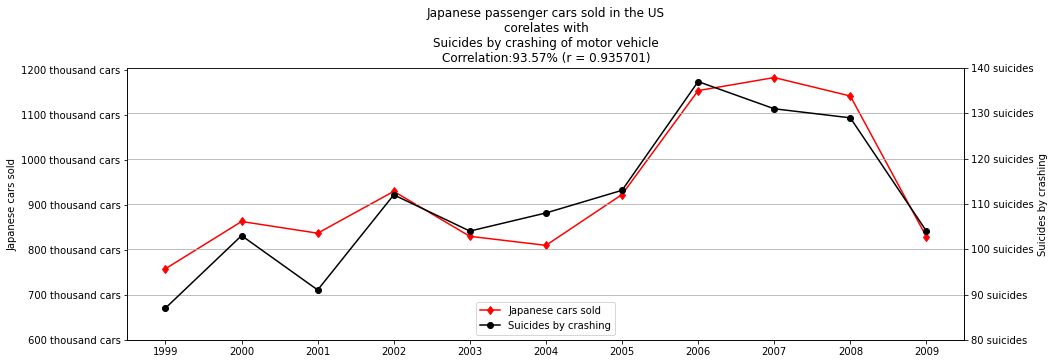

In [ ]:
from numpy import core
default_x_ticks = range(len(years))
plt.figure(num=None, figsize=(15, 5))
ax1 = plt.gca()
line1, = ax1.plot(default_x_ticks, cars_sold,'-d', c = 'r')
ticks, labels = plt.yticks();
plt.yticks(np.array(ticks)-100, [str(int(res)-100) +" thousand cars" for res in ticks])
ax2 = ax1.twinx()
line2, = ax2.plot(default_x_ticks, suicides_by_crashing,'-o', c='black')
ax1.set_ylabel("Japanese cars sold")
ax2.set_ylabel("Suicides by crashing")
ax2.legend((line1, line2),("Japanese cars sold", "Suicides by crashing"),loc="lower center")
plt.xticks(default_x_ticks,years)
ticks, labels = plt.yticks();
plt.yticks(ticks, [str(int(res)) +" suicides" for res in ticks])
plt.grid()
plt.title(f"Japanese passenger cars sold in the US\ncorelates with\nSuicides by crashing of motor vehicle\nCorrelation:{corelation_coeff*100:.2f}% (r = {corelation_coeff:.6f})")
plt.show()

## 2.Pair plot for Iris dataset 

In [ ]:
#load iris data from sklearn
iris_data = datasets.load_iris()
# segregating dataset in required classes
sepal_len = iris_data.data[:,0]
sepal_width = iris_data.data[:,1]
petal_len = iris_data.data[:,2]
petal_width = iris_data.data[:,3]

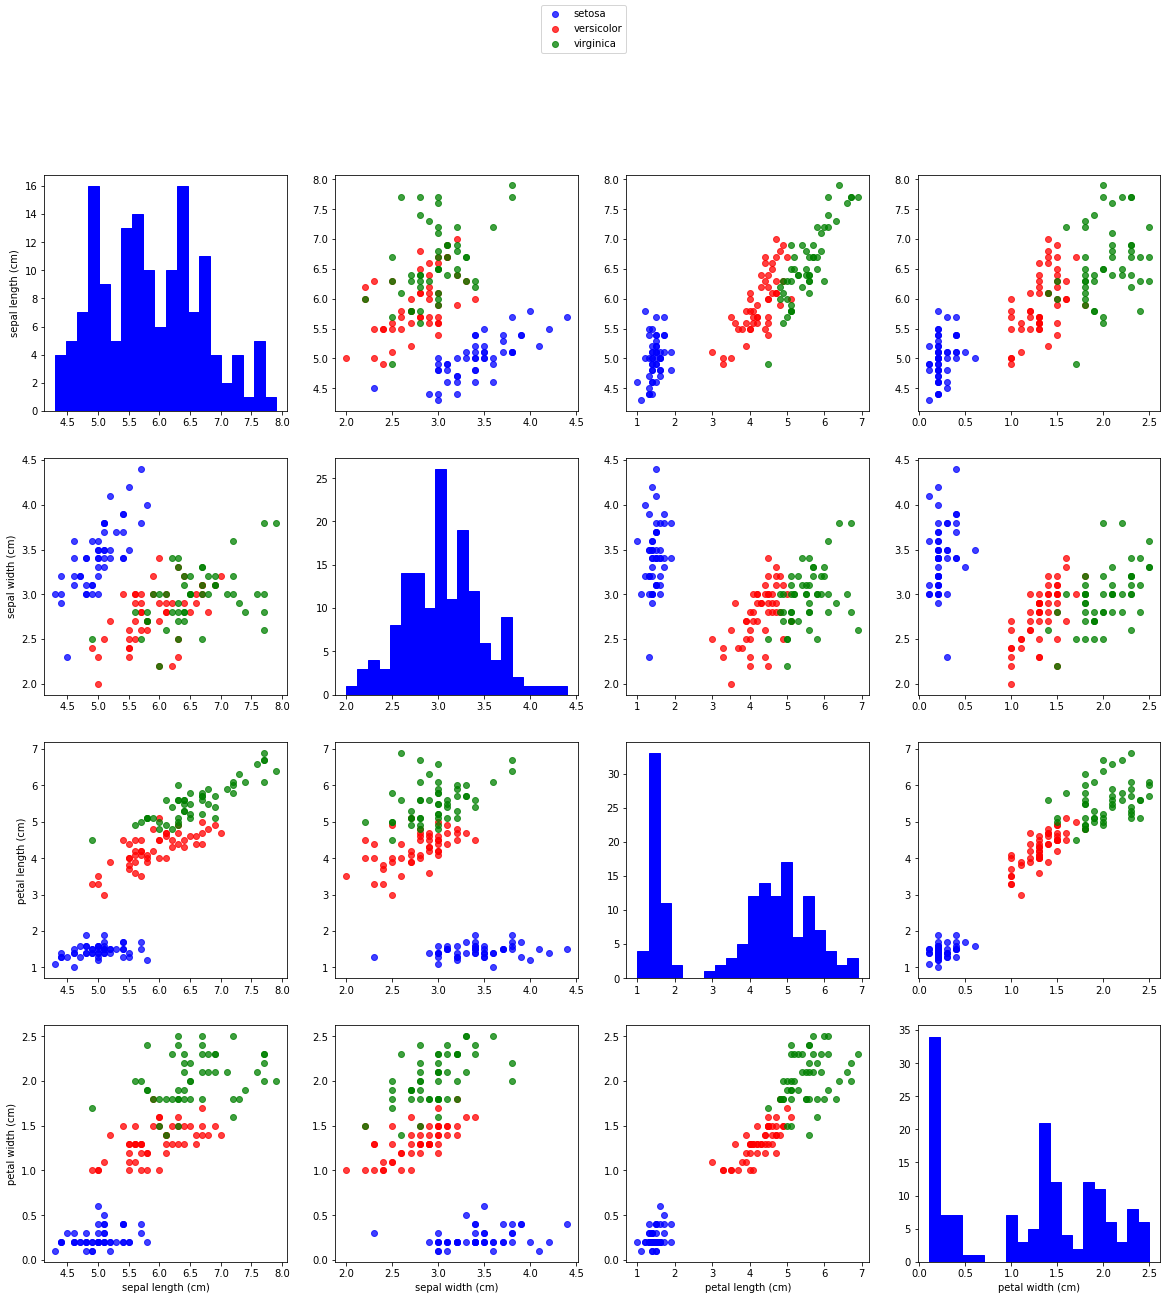

In [ ]:
# initilaizing the 4*4 subplot for mimicing pairplot in matplotlib
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
alpha = 0.75 # common transparency attribute for all sctterplots
bins = 20 # common bins for all histograms
#diagnal plot so will be a histogram of sepal length
ax[0,0].hist(sepal_len,bins, facecolor='blue', edgecolor ='b')
ax[0,0].set_ylabel("sepal length (cm)")

# scatter plots for the first row
l1 = ax[0,1].scatter(sepal_width[:50],sepal_len[:50],c='b',alpha=alpha)
l2 = ax[0,1].scatter(sepal_width[50:100],sepal_len[50:100],c = 'r',alpha=alpha)
l3 = ax[0,1].scatter(sepal_width[100:150],sepal_len[100:150], c = 'g',alpha=alpha)

ax[0,2].scatter(petal_len[:50],sepal_len[:50],c='b',alpha=alpha)
ax[0,2].scatter(petal_len[50:100],sepal_len[50:100],c = 'r',alpha=alpha)
ax[0,2].scatter(petal_len[100:150],sepal_len[100:150], c = 'g',alpha=alpha)

ax[0,3].scatter(petal_width[:50],sepal_len[:50],c='b',alpha=alpha)
ax[0,3].scatter(petal_width[50:100],sepal_len[50:100],c = 'r',alpha=alpha)
ax[0,3].scatter(petal_width[100:150],sepal_len[100:150], c = 'g',alpha=alpha)

#scatter plot for second row
ax[1,0].scatter(sepal_len[:50],sepal_width[:50],c='b',alpha=alpha)
ax[1,0].scatter(sepal_len[50:100],sepal_width[50:100],c = 'r',alpha=alpha)
ax[1,0].scatter(sepal_len[100:150],sepal_width[100:150], c = 'g',alpha=alpha)
ax[1,0].set_ylabel("sepal width (cm)")

# diagnal plot so will be histogram of sepal width
ax[1,1].hist(sepal_width,bins, facecolor='blue', edgecolor ='b')

#scatter plots for second row continued
ax[1,2].scatter(petal_len[:50],sepal_width[:50],c='b',alpha=alpha)
ax[1,2].scatter(petal_len[50:100],sepal_width[50:100],c = 'r',alpha=alpha)
ax[1,2].scatter(petal_len[100:150],sepal_width[100:150], c = 'g',alpha=alpha)


ax[1,3].scatter(petal_width[:50],sepal_width[:50],c='b',alpha=alpha)
ax[1,3].scatter(petal_width[50:100],sepal_width[50:100],c = 'r',alpha=alpha)
ax[1,3].scatter(petal_width[100:150],sepal_width[100:150], c = 'g',alpha=alpha)

#scatter plot for third row
ax[2,0].scatter(sepal_len[:50],petal_len[:50],c='b',alpha=alpha)
ax[2,0].scatter(sepal_len[50:100],petal_len[50:100],c = 'r',alpha=alpha)
ax[2,0].scatter(sepal_len[100:150],petal_len[100:150], c = 'g',alpha=alpha)
ax[2,0].set_ylabel("petal length (cm)")

ax[2,1].scatter(sepal_width[:50],petal_len[:50],c='b',alpha=alpha)
ax[2,1].scatter(sepal_width[50:100],petal_len[50:100],c = 'r',alpha=alpha)
ax[2,1].scatter(sepal_width[100:150],petal_len[100:150], c = 'g',alpha=alpha)

# diagnal plot so will be histogram of petal length
ax[2,2].hist(petal_len,bins, facecolor='blue', edgecolor ='b')
#scatter plot for third row continued.
ax[2,3].scatter(petal_width[:50],petal_len[:50],c='b',alpha=alpha)
ax[2,3].scatter(petal_width[50:100],petal_len[50:100],c = 'r',alpha=alpha)
ax[2,3].scatter(petal_width[100:150],petal_len[100:150], c = 'g',alpha=alpha)

#scatter plots for fourth row
ax[3,0].scatter(sepal_len[:50],petal_width[:50],c='b',alpha=alpha)
ax[3,0].scatter(sepal_len[50:100],petal_width[50:100],c = 'r',alpha=alpha)
ax[3,0].scatter(sepal_len[100:150],petal_width[100:150], c = 'g',alpha=alpha)
ax[3,0].set_xlabel("sepal length (cm)")
ax[3,0].set_ylabel("petal width (cm)")

ax[3,1].scatter(sepal_width[:50],petal_width[:50],c='b',alpha=alpha)
ax[3,1].scatter(sepal_width[50:100],petal_width[50:100],c = 'r',alpha=alpha)
ax[3,1].scatter(sepal_width[100:150],petal_width[100:150], c = 'g',alpha=alpha)
ax[3,1].set_xlabel("sepal width (cm)")

ax[3,2].scatter(petal_len[:50],petal_width[:50],c='b',alpha=alpha)
ax[3,2].scatter(petal_len[50:100],petal_width[50:100],c = 'r',alpha=alpha)
ax[3,2].scatter(petal_len[100:150],petal_width[100:150], c = 'g',alpha=alpha)
ax[3,2].set_xlabel("petal length (cm)")
ylim = ax[3,0].get_ylim()

# diagnal plot so will be histogram of petal width
ax[3,3].hist(petal_width,bins, facecolor='blue', edgecolor ='b')
ax[3,3].set_xlabel("petal width (cm)")

# common lengend for the plot
fig.legend((l1,l2,l3),("setosa","versicolor","virginica"),loc = 'upper center')

plt.show()

## 3) Reproduce the graphs on overlapping data from “Fundamentals of Data Visualization” https://serialmentor.com/dataviz/overlapping-points.html that is figures 18.1 to 18.4, using matplotlib as subplots in a single figure

### Download data for visualizations from "https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv"

In [ ]:
#reading the dataset through pandas with this url
url ="https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv"
cars_df = pd.read_csv(url,index_col='Unnamed: 0')

In [ ]:
# splitting the data into different drive train types
fwd_cars = cars_df[cars_df['drv'] == "f"]
rwd_cars = cars_df[cars_df['drv'] == "r"]
four_wd_cars = cars_df[cars_df['drv'] == "4"]

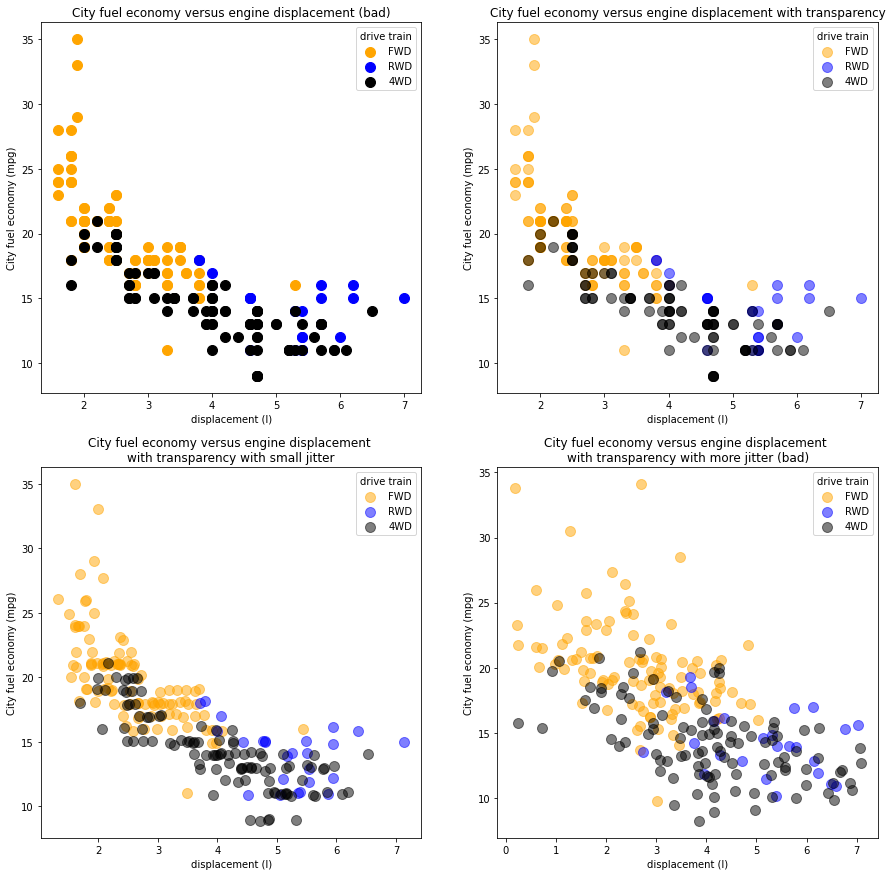

In [ ]:
# initializing 2*2 subplots 
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
alpha = 0.5 # common attribute for transperency
s = 100 # common attribute for marker size
# first scatter plot show the visualization with no transperency or jitter
l1 = ax[0,0].scatter(fwd_cars['displ'],fwd_cars['cty'],c = 'orange',s=s)
l2 = ax[0,0].scatter(rwd_cars['displ'],rwd_cars['cty'],c = 'blue',s=s)
l3 = ax[0,0].scatter(four_wd_cars['displ'],four_wd_cars['cty'],c = 'black',s=s)
ax[0,0].set_ylabel("City fuel economy (mpg)")
ax[0,0].set_xlabel("displacement (I)")
ax[0,0].legend((l1,l2,l3),("FWD","RWD","4WD"),loc = 'upper right',title = "drive train")
ax[0,0].set_title("City fuel economy versus engine displacement (bad)")

# second scatter plot shows the visualization with transperency  and no jitter
l4 = ax[0,1].scatter(fwd_cars['displ'],fwd_cars['cty'],c = 'orange',s=s,alpha = alpha)
l5 = ax[0,1].scatter(rwd_cars['displ'],rwd_cars['cty'],c = 'blue',s=s,alpha = alpha)
l6 = ax[0,1].scatter(four_wd_cars['displ'],four_wd_cars['cty'],c = 'black',s=s,alpha = alpha)
ax[0,1].set_ylabel("City fuel economy (mpg)")
ax[0,1].set_xlabel("displacement (I)")
ax[0,1].legend((l4,l5,l6),("FWD","RWD","4WD"),loc = 'upper right',title = "drive train")
ax[0,1].set_title("City fuel economy versus engine displacement with transparency")

# adding small jitter to dataset
fwd_displ_jitter = fwd_cars['displ'] + np.random.normal(0, 0.2, size=len(fwd_cars['displ']))
fwd_cty_jitter = fwd_cars['cty'] + np.random.normal(0, 0.1, size=len(fwd_cars['cty']))

rwd_displ_jitter = rwd_cars['displ'] + np.random.normal(0, 0.2, size=len(rwd_cars['displ']))
rwd_cty_jitter = rwd_cars['cty'] + np.random.normal(0, 0.1, size=len(rwd_cars['cty']))

four_wd_displ_jitter = four_wd_cars['displ'] + np.random.normal(0, 0.2, size=len(four_wd_cars['displ']))
four_wd_cty_jitter = four_wd_cars['cty'] + np.random.normal(0, 0.1, size=len(four_wd_cars['cty']))

# third scatter plot shows the visualization with transperency and small jitter
l4 = ax[1,0].scatter(fwd_displ_jitter,fwd_cty_jitter,c = 'orange',s=s,alpha = alpha)
l5 = ax[1,0].scatter(rwd_displ_jitter,rwd_cty_jitter,c = 'blue',s=s,alpha = alpha)
l6 = ax[1,0].scatter(four_wd_displ_jitter,four_wd_cty_jitter,c = 'black',s=s,alpha = alpha)
ax[1,0].set_ylabel("City fuel economy (mpg)")
ax[1,0].set_xlabel("displacement (I)")
ax[1,0].legend((l4,l5,l6),("FWD","RWD","4WD"),loc = 'upper right',title = "drive train")
ax[1,0].set_title("City fuel economy versus engine displacement \nwith transparency with small jitter")

# adding more jitter
fwd_displ_jitter = fwd_cars['displ'] + np.random.normal(0, 1, size=len(fwd_cars['displ']))
fwd_cty_jitter = fwd_cars['cty'] + np.random.normal(0, 1, size=len(fwd_cars['cty']))

rwd_displ_jitter = rwd_cars['displ'] + np.random.normal(0, 1, size=len(rwd_cars['displ']))
rwd_cty_jitter = rwd_cars['cty'] + np.random.normal(0, 1, size=len(rwd_cars['cty']))

four_wd_displ_jitter = four_wd_cars['displ'] + np.random.normal(0, 1, size=len(four_wd_cars['displ']))
four_wd_cty_jitter = four_wd_cars['cty'] + np.random.normal(0, 1, size=len(four_wd_cars['cty']))

# fourth scatter plot shows the visualization with transperency and high jitter
l7 = ax[1,1].scatter(fwd_displ_jitter,fwd_cty_jitter,c = 'orange',s=s,alpha = alpha)
l8 = ax[1,1].scatter(rwd_displ_jitter,rwd_cty_jitter,c = 'blue',s=s,alpha = alpha)
l9 = ax[1,1].scatter(four_wd_displ_jitter,four_wd_cty_jitter,c = 'black',s=s,alpha = alpha)
ax[1,1].set_ylabel("City fuel economy (mpg)")
ax[1,1].set_xlabel("displacement (I)")
ax[1,1].legend((l7,l8,l9),("FWD","RWD","4WD"),loc = 'upper right',title = "drive train")
ax[1,1].set_title("City fuel economy versus engine displacement \nwith transparency with more jitter (bad)")
plt.show()